사진들을 데이터셋으로 활용할 수 있게 Numpy 형식으로 변환해 파일로 저장한다.

    - 이미지가 컬러 이미지이므로 RGB로 변환한다
    - RGB의 각 색상 값을 0~1까지의 실수로 변환한다
    

In [1]:
# 이미지들을 NumPy 형식으로 변환하기
import numpy as np
from PIL import Image
import os, glob, random

In [2]:

outfile = "image/photos.npz" # 저장할 파일 이름
max_photo = 300 # 사용할 장 수
photo_size = 32 # 이미지 크기
x = [] # 이미지 데이터
y = [] # 레이블 데이터

In [3]:
# path 내부의 이미지 읽어 들이기 --- (*1)
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    # 파일 처리하기
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        # 이미지 파일 읽어 들이기
        img = Image.open(f)
        img = img.convert("RGB") # 색공간 변환하기
        img = img.resize((photo_size, photo_size)) # 크기 변경하기
        img = np.asarray(img)
        x.append(img)
        y.append(label)



각 레이블 확인

    0  초밥
    1  샐러드
    2  두부

In [4]:
# 디렉터리 읽어 들이기 --- (*2)

glob_files("./image/pizza", 0)
glob_files("./image/jjajangmyun", 1)
glob_files("./image/donut", 2)
glob_files("./image/salad", 3)
glob_files("./image/sushi", 4)


# 파일로 저장하기 --- (*3)
np.savez(outfile, x=x, y=y)
print("저장했습니다:" + outfile, len(x))


저장했습니다:image/photos.npz 1129


## 저장한 이미지가 제대로 numpy형식인지 확인

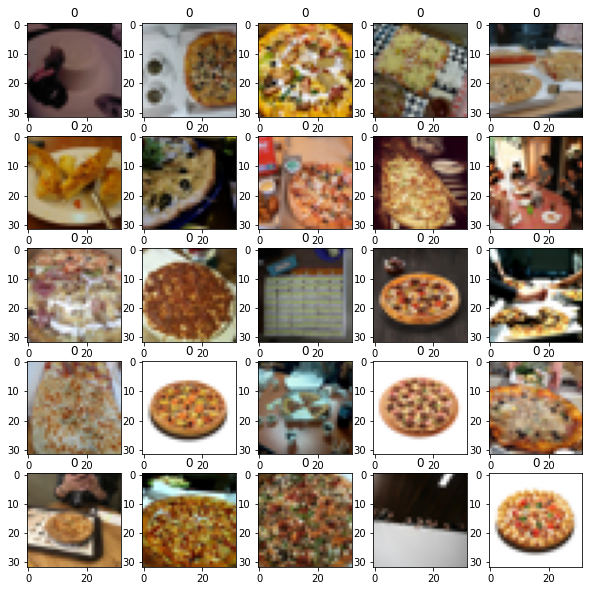

In [5]:
import matplotlib.pyplot as plt

# 사진 데이타 읽어 들이기
photos = np.load('./image/photos.npz')

x = photos['x']
y = photos['y']

idx = 50# 시작 인덱스
          # 인덱스값을 100이나 200으로 변경하면 샐러드가 나올 것이다
    
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])

plt.show()    